In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Project/2023/BIGCON/

/content/drive/MyDrive/Project/2023/BIGCON


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import geopandas as gpd

In [6]:
college = gpd.read_file('서울시 대학교 공간데이터/2020/TL_UNIV_2020.shp', encoding = 'cp949')
college.head(2)

,UNIV_ID,STDR_YEAR,ELSM,UNIV_CD,UNIV_NM,BNHH_SN,UNIV_STTUS,LC,FOND,OLD_ZIP,ADRES,ENRL_ST_SM,ENRL_ST_CN,TMPABSSKL,TCHER_CN,TM_X,TM_Y,geometry
0,48110001.0,202004,대학원,NaN,가톨릭대학교교회음악대학원,제3캠퍼스,기존,서울,사립,03083,"서울특별시종로구창경궁로296-12(혜화동,가톨릭대학교성신교정)",0.0,0.0,0.0,0.0,200377.582826,554053.289913,POINT (200377.583 554053.290)
1,48110002.0,202004,대학원,NaN,가톨릭대학교보건대학원,제2캠퍼스,기존,서울,사립,06591,"서울특별시서초구반포대로222(반포동,가톨릭대학교성의교정)",0.0,0.0,0.0,0.0,200563.146912,544622.519540,POINT (200563.147 544622.520)


In [7]:
college['ELSM'].unique()

array(['대학원', '대학', '대학원대학', '전문대학'], dtype=object)

In [8]:
college['UNIV_STTUS'].unique()

array(['기존', '폐교', '신설'], dtype=object)

In [9]:
college = college[college['ELSM'] != '대학원']
college = college[college['UNIV_STTUS'] != '폐교']

In [10]:
college.shape

(88, 18)

In [11]:
seoul_pnu = gpd.read_file('서울시_필지_LX맵/서울시_필지전체.shp', encoding = 'cp949')
seoul_pnu.head(2)

,PNU,SGG_CD,SGG_NM,EMD_CD,EMD_NM,geometry
0,1111010100100010000,11110,종로구,11110101,청운동,"POLYGON ((197211.824 554668.412, 197240.351 55..."
1,1111010100100010001,11110,종로구,11110101,청운동,"POLYGON ((197300.251 554580.847, 197298.254 55..."


In [12]:
seoul_pnu.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 919736 entries, 0 to 919735
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   PNU       919736 non-null  object  
 1   SGG_CD    919736 non-null  object  
 2   SGG_NM    919736 non-null  object  
 3   EMD_CD    919736 non-null  object  
 4   EMD_NM    919735 non-null  object  
 5   geometry  919736 non-null  geometry
dtypes: geometry(1), object(5)
memory usage: 42.1+ MB


In [13]:
seoul_pnu = seoul_pnu.astype({'PNU' : 'int'})
seoul_pnu.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 919736 entries, 0 to 919735
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   PNU       919736 non-null  int64   
 1   SGG_CD    919736 non-null  object  
 2   SGG_NM    919736 non-null  object  
 3   EMD_CD    919736 non-null  object  
 4   EMD_NM    919735 non-null  object  
 5   geometry  919736 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 42.1+ MB


In [28]:
raw_data = pd.read_csv('2023빅콘테스트_빅데이터플랫폼활용분야_지정주제(부동산)_데이터셋/필지단위 소상공인 매출등급 정보.csv', encoding = 'cp949')
test = pd.read_excel('2023빅콘테스트_빅데이터플랫폼활용분야_지정주제(부동산)_데이터셋/소상공인 매출등급 예상 대상 필지.xlsx')
raw_data.head(2)

,DATA_CRTR_YM,LT_UNQ_NO,STDG_EMD_CD,INDUSTRY_CD,SLS_GRD
0,202201,1111010100100030100,11110101,A03,4
1,202201,1111010100100480000,11110101,A01,2


In [29]:
# train이면 1, test면 0 변수 생성
raw_data['train'] = 1
# test 데이터는 202301과 202302가 열별로 되어있어 각각 데이터프레임 만든 후 raw데이터 밑으로 붙이기
test_2301 = test[['LT_UNQ_NO', 'INDUSTRY_CD', 'STDG_EMD_CD']]
test_2302 = test[['LT_UNQ_NO', 'INDUSTRY_CD', 'STDG_EMD_CD']]
test_2301['DATA_CRTR_YM'] = 202301
test_2302['DATA_CRTR_YM'] = 202302
test_2301['train'] = 0
test_2302['train'] = 0

<ipython-input-29-4a71628c8a60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2301['DATA_CRTR_YM'] = 202301
<ipython-input-29-4a71628c8a60>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_2302['DATA_CRTR_YM'] = 202302


In [42]:
test_2301 = test_2301[['DATA_CRTR_YM', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD', 'train']]
test_2302 = test_2302[['DATA_CRTR_YM', 'LT_UNQ_NO', 'STDG_EMD_CD', 'INDUSTRY_CD', 'train']]

In [43]:
raw_data = pd.concat([raw_data, test_2301, test_2302])

In [44]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176040 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DATA_CRTR_YM  1176040 non-null  int64  
 1   LT_UNQ_NO     1176040 non-null  int64  
 2   STDG_EMD_CD   1176040 non-null  int64  
 3   INDUSTRY_CD   1176040 non-null  object 
 4   SLS_GRD       1156040 non-null  float64
 5   train         1176040 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 62.8+ MB


In [45]:
raw_data2 = raw_data.drop_duplicates(subset = 'LT_UNQ_NO', keep = 'first', ignore_index = True)
raw_data2 = raw_data2[['LT_UNQ_NO']]
raw_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74303 entries, 0 to 74302
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LT_UNQ_NO  74303 non-null  int64
dtypes: int64(1)
memory usage: 580.6 KB


In [46]:
df = pd.merge(left = seoul_pnu, right = raw_data2, left_on = 'PNU', right_on = 'LT_UNQ_NO', how = 'right')
df.head(2)

,PNU,SGG_CD,SGG_NM,EMD_CD,EMD_NM,geometry,LT_UNQ_NO
0,1.111010e+18,11110,종로구,11110101,청운동,"POLYGON ((197073.176 554737.046, 197092.636 55...",1111010100100030100
1,1.111010e+18,11110,종로구,11110101,청운동,"POLYGON ((197305.633 554178.725, 197306.531 55...",1111010100100480000


In [47]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 74303 entries, 0 to 74302
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   PNU        74199 non-null  float64 
 1   SGG_CD     74199 non-null  object  
 2   SGG_NM     74199 non-null  object  
 3   EMD_CD     74199 non-null  object  
 4   EMD_NM     74199 non-null  object  
 5   geometry   74199 non-null  geometry
 6   LT_UNQ_NO  74303 non-null  int64   
dtypes: float64(1), geometry(1), int64(1), object(4)
memory usage: 4.5+ MB


In [48]:
df.drop(['PNU'], axis = 1, inplace = True)
df = df[['LT_UNQ_NO', 'SGG_CD', 'SGG_NM', 'EMD_CD', 'EMD_NM', 'geometry']]
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 74303 entries, 0 to 74302
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   LT_UNQ_NO  74303 non-null  int64   
 1   SGG_CD     74199 non-null  object  
 2   SGG_NM     74199 non-null  object  
 3   EMD_CD     74199 non-null  object  
 4   EMD_NM     74199 non-null  object  
 5   geometry   74199 non-null  geometry
dtypes: geometry(1), int64(1), object(4)
memory usage: 4.0+ MB


In [84]:
df_in_match = df.dropna(axis = 0)
df_notin_match = df[df['geometry'].isna()]

### df_in_match 필지가 대학교를 포함하고 있는지 여부

In [50]:
college['buffer'] = college.convex_hull.buffer(500)

In [51]:
college.head(2)

,UNIV_ID,STDR_YEAR,ELSM,UNIV_CD,UNIV_NM,BNHH_SN,UNIV_STTUS,LC,FOND,OLD_ZIP,ADRES,ENRL_ST_SM,ENRL_ST_CN,TMPABSSKL,TCHER_CN,TM_X,TM_Y,geometry,buffer
9,48110010.0,202004,대학,7001337,가톨릭대학교,제2캠퍼스,기존,서울,사립,06591,"서울특별시서초구반포대로222(반포동,가톨릭대학교성의교정)",836.0,807.0,29.0,884.0,200563.146912,544622.519540,POINT (200563.147 544622.520),"POLYGON ((201063.147 544622.520, 201060.739 54..."
10,48110011.0,202004,대학,7001337,가톨릭대학교,제3캠퍼스,기존,서울,사립,03083,"서울특별시종로구창경궁로296-12(혜화동,가톨릭대학교성신교정)",268.0,192.0,76.0,22.0,200377.582826,554053.289913,POINT (200377.583 554053.290),"POLYGON ((200877.583 554053.290, 200875.175 55..."


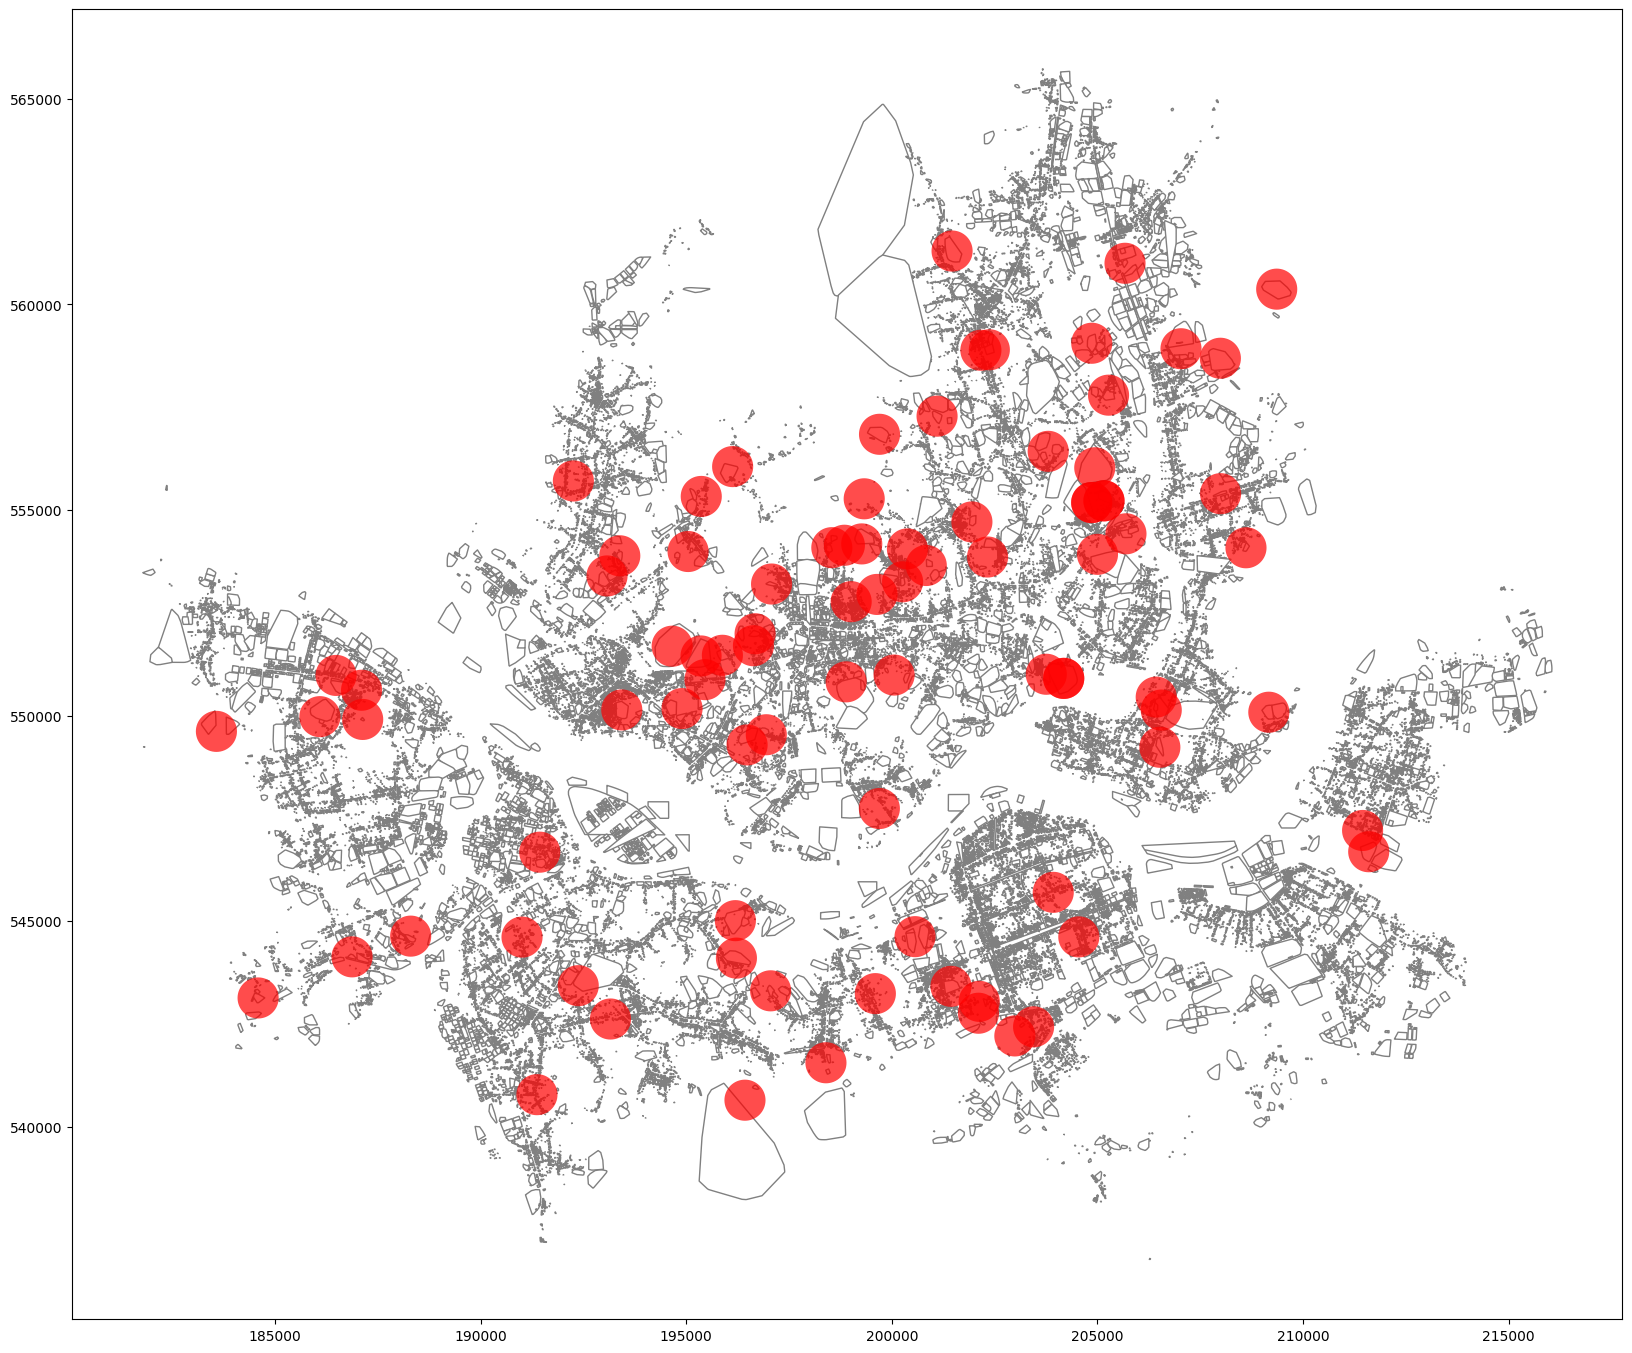

In [52]:
ax = df_in_match.convex_hull.plot(figsize = (20, 20), color='white', edgecolor='gray')
college['buffer'].convex_hull.plot(ax = ax, color = 'red', alpha = 0.7)
plt.show()

In [58]:
college_count = pd.DataFrame()
for i in range(len(college)) :
  college_count[str(i)] = df_in_match['geometry'].intersects(college['buffer'].iloc[i])
college_count

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74298,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74299,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74300,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
74301,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [59]:
college_count.sum(axis = 1)

0        0
1        0
2        0
3        0
4        0
        ..
74298    0
74299    0
74300    0
74301    0
74302    0
Length: 74199, dtype: int64

In [60]:
df_in_match['college_count'] = college_count.sum(axis = 1).apply(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [63]:
df_in_match.head()

,LT_UNQ_NO,SGG_CD,SGG_NM,EMD_CD,EMD_NM,geometry,college_count
0,1111010100100030100,11110,종로구,11110101,청운동,"POLYGON ((197073.176 554737.046, 197092.636 55...",0
1,1111010100100480000,11110,종로구,11110101,청운동,"POLYGON ((197305.633 554178.725, 197306.531 55...",0
2,1111010100100590001,11110,종로구,11110101,청운동,"POLYGON ((197332.536 554075.806, 197333.169 55...",0
3,1111010100100590005,11110,종로구,11110101,청운동,"POLYGON ((197292.491 554081.166, 197302.207 55...",0
4,1111010100100690000,11110,종로구,11110101,청운동,"POLYGON ((197368.683 554110.560, 197369.976 55...",0


In [65]:
df2 = df_in_match.drop(df_in_match.columns[1:6], axis = 1)
df2

,LT_UNQ_NO,college_count
0,1111010100100030100,0
1,1111010100100480000,0
2,1111010100100590001,0
3,1111010100100590005,0
4,1111010100100690000,0
...,...,...
74298,1174010800104070000,0
74299,1174010900100390026,0
74300,1174010900101130038,0
74301,1174010900103400035,0


### df_notin_match 필지가 대학교를 포함하고 있는지 여부

In [85]:
df_notin_match

,LT_UNQ_NO,SGG_CD,SGG_NM,EMD_CD,EMD_NM,geometry
245,1111011000102450006,NaN,NaN,NaN,NaN,None
9543,1120010700103770000,NaN,NaN,NaN,NaN,None
13150,1121510500108610000,NaN,NaN,NaN,NaN,None
18666,1126010500106150005,NaN,NaN,NaN,NaN,None
24084,1132010500107340000,NaN,NaN,NaN,NaN,None
...,...,...,...,...,...,...
73695,1123010500104750146,NaN,NaN,NaN,NaN,None
73712,1126010500106160001,NaN,NaN,NaN,NaN,None
73747,1130510400102410002,NaN,NaN,NaN,NaN,None
73762,1135010300107580000,NaN,NaN,NaN,NaN,None


In [86]:
df_notin_match['EMD'] = df_notin_match['LT_UNQ_NO'].apply(lambda x: str(x)[0:8])

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


서울시 법정동 shp 출처 : http://data.nsdi.go.kr/dataset/15145

서울시 법정동 shp 파일과 대학교 shp merge해서 법정동별 대학교 포함 여부 체크

In [72]:
emd = gpd.read_file('LSMD_ADM_SECT_UMD_서울/LSMD_ADM_SECT_UMD_11_202309.shp', encoding = 'cp949')
emd.head(2)

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry
0,11560106,11560,영등포동5가,4642,"POLYGON ((191883.157 546731.119, 191882.344 54..."
1,11110154,11110,장사동,4315,"POLYGON ((199591.692 552288.166, 199591.989 55..."


In [73]:
college_count2 = pd.DataFrame()
for i in range(len(college)) :
  college_count2[str(i)] = emd['geometry'].intersects(college['buffer'].iloc[i])
college_count2

,0,1,2,3,4,5,6,7,8,9,...,78,79,80,81,82,83,84,85,86,87
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
463,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
464,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [74]:
college_count2.sum(axis = 1)

0      1
1      0
2      0
3      1
4      1
      ..
462    0
463    0
464    0
465    1
466    1
Length: 467, dtype: int64

In [75]:
emd['college_count'] = college_count2.sum(axis = 1).apply(lambda x: 1 if x > 0 else 0)

In [78]:
emd.head()

,EMD_CD,COL_ADM_SE,EMD_NM,SGG_OID,geometry,college_count
0,11560106,11560,영등포동5가,4642,"POLYGON ((191883.157 546731.119, 191882.344 54...",1
1,11110154,11110,장사동,4315,"POLYGON ((199591.692 552288.166, 199591.989 55...",0
2,11110155,11110,관수동,4316,"POLYGON ((199319.632 552274.724, 199319.632 55...",0
3,11110156,11110,종로3가,4317,"POLYGON ((199563.824 552374.671, 199564.237 55...",1
4,11110180,11110,교북동,4341,"POLYGON ((196450.541 552624.268, 196452.603 55...",1


In [87]:
df_notin_match.head()

,LT_UNQ_NO,SGG_CD,SGG_NM,EMD_CD,EMD_NM,geometry,EMD
245,1111011000102450006,NaN,NaN,NaN,NaN,None,11110110
9543,1120010700103770000,NaN,NaN,NaN,NaN,None,11200107
13150,1121510500108610000,NaN,NaN,NaN,NaN,None,11215105
18666,1126010500106150005,NaN,NaN,NaN,NaN,None,11260105
24084,1132010500107340000,NaN,NaN,NaN,NaN,None,11320105


In [88]:
# 서울시 법정동별로 대학교 포함 여부 count한 파일과 df_notin_data merge
df_notin_match = pd.merge(left = df_notin_match, right = emd, left_on = 'EMD', right_on = 'EMD_CD', how = 'left')
df_notin_match = df_notin_match[['LT_UNQ_NO', 'college_count']]
df_notin_match

,LT_UNQ_NO,college_count
0,1111011000102450006,1
1,1120010700103770000,1
2,1121510500108610000,1
3,1126010500106150005,1
4,1132010500107340000,1
...,...,...
99,1123010500104750146,0
100,1126010500106160001,1
101,1130510400102410002,1
102,1135010300107580000,1


### raw_data와 merge

In [90]:
college_contain = pd.concat([df2, df_notin_match])
college_contain

,LT_UNQ_NO,college_count
0,1111010100100030100,0
1,1111010100100480000,0
2,1111010100100590001,0
3,1111010100100590005,0
4,1111010100100690000,0
...,...,...
99,1123010500104750146,0
100,1126010500106160001,1
101,1130510400102410002,1
102,1135010300107580000,1


In [91]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1176040 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   DATA_CRTR_YM  1176040 non-null  int64  
 1   LT_UNQ_NO     1176040 non-null  int64  
 2   STDG_EMD_CD   1176040 non-null  int64  
 3   INDUSTRY_CD   1176040 non-null  object 
 4   SLS_GRD       1156040 non-null  float64
 5   train         1176040 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 62.8+ MB


In [93]:
raw_data2 = pd.merge(left = raw_data, right = college_contain, on = 'LT_UNQ_NO', how = 'left')
raw_data2.isna().sum()

DATA_CRTR_YM         0
LT_UNQ_NO            0
STDG_EMD_CD          0
INDUSTRY_CD          0
SLS_GRD          20000
train                0
college_count        0
dtype: int64

In [95]:
raw_data2.to_csv('필지기준_대학교_포함여부.csv', index = False)